In [1]:
import pandas as pd

### Basic data analysis
Get familiar with feature distributions and values across categories for the url data. This just uses the url dataset, which has the following features:  
* `story_url`: the url of the story 
* `category`: the category the story belongs to
* `author`: username
* `num_comments`: number of comments left on the story
* `num_views`: number of hits
* `num_favorites`: number of people who favorited this story

In [2]:
df = pd.read_csv('../data/literotica_urls.tsv', sep='\t')
df.columns

Index(['story_url', 'num_pages', 'category', 'author', 'num_comments',
       'num_views', 'num_favorites'],
      dtype='object')

In [3]:
# Convert numeric categories to numbers
df.num_pages = pd.to_numeric(df.num_pages, errors='coerce')
df.num_comments = pd.to_numeric(df.num_comments, errors='coerce')
df.num_views = pd.to_numeric(df.num_views, errors='coerce')
df.num_favorites = pd.to_numeric(df.num_favorites, errors='coerce')

In [4]:
# Look at number of stories per categories
by_category = df.groupby('category')

for category, group in by_category:
    print(category, '\t', group.story_url.count())

OhMissScarlett 	 1
anal-sex-stories 	 7224
bdsm-stories 	 6578
chain-stories 	 3804
erotic-couplings 	 7390
erotic-horror 	 8415
exhibitionist-voyeur 	 8724
fetish-stories 	 9847
first-time-sex-stories 	 8325
gay-sex-stories 	 6965


In [5]:
# Number of unique authors
by_author = df.groupby('author')
print('Number of authors:', len(by_author))

# Most popular authors by number of stories written
by_author.count().sort_values('story_url', ascending=False)['story_url'].head(10)

Number of authors: 13008


author
sr71plt                 466
RedHairedandFriendly    385
Samuelx                 332
manyeyedhydra           248
gupiao                  242
yvonne2011              240
Ashson                  240
Goldeniangel            238
velvetpie               206
Feare909                203
Name: story_url, dtype: int64

In [6]:
# Most popular authors by number of pages written
by_author.sum().sort_values('num_pages', ascending=False)['num_pages'].head(10)

author
sr71plt                 796.0
gupiao                  776.0
RedHairedandFriendly    670.0
Feare909                532.0
manyeyedhydra           510.0
Tx Tall Tales           412.0
walterio                375.0
xelliebabex             366.0
deathlynx               364.0
yvonne2011              360.0
Name: num_pages, dtype: float64

In [7]:
# Most popular authors by number of comments received
by_author.sum().sort_values('num_comments', ascending=False)['num_comments'].head(10)

author
40                      331183.0
manyeyedhydra             4639.0
lgreenwood                4180.0
Tx Tall Tales             3449.0
M-Y-Erotica               2812.0
Rozalin_0123              2333.0
silkstockingslover        2150.0
RedHairedandFriendly      1723.0
gupiao                    1690.0
adjoaq                    1590.0
Name: num_comments, dtype: float64

In [8]:
# Most popular authors by number of views
by_author.sum().sort_values('num_views', ascending=False)['num_views'].head(10)

author
Goldeniangel     19903881.0
Anal Slave       19515452.0
manyeyedhydra    18566355.0
M-Y-Erotica      15743268.0
Boxlicker101     15156351.0
sr71plt          14766463.0
Selena_Kitt      14206921.0
Samuelx          13301422.0
damonX           12241803.0
BlewWater69      12004110.0
Name: num_views, dtype: float64

In [9]:
# Most popular authors by number of favorites
by_author.sum().sort_values('num_favorites', ascending=False)['num_favorites'].head(10)

author
Rozalin_0123          12662.0
lgreenwood            12620.0
Tx Tall Tales         11168.0
ZenZerker              9791.0
manyeyedhydra          9791.0
M-Y-Erotica            8128.0
silkstockingslover     7740.0
Goldeniangel           5557.0
en_extase              5032.0
lovecraft68            4814.0
Name: num_favorites, dtype: float64

In [11]:
# manyeyedhydra seems to be a succcessful author

# Average page length per category
by_category.mean().sort_values('num_pages', ascending=False)['num_pages'].head(10)

category
erotic-horror             1.864528
gay-sex-stories           1.782053
chain-stories             1.767350
first-time-sex-stories    1.710631
exhibitionist-voyeur      1.589065
bdsm-stories              1.569778
fetish-stories            1.549000
erotic-couplings          1.535589
anal-sex-stories          1.499169
OhMissScarlett                 NaN
Name: num_pages, dtype: float64

In [12]:
# Average number of comments per category
by_category.mean().sort_values('num_comments', ascending=False)['num_comments'].head(10)

category
OhMissScarlett            331183.000000
gay-sex-stories                6.539411
first-time-sex-stories         5.885405
chain-stories                  4.671150
erotic-horror                  4.662151
anal-sex-stories               4.207641
fetish-stories                 3.569209
exhibitionist-voyeur           3.238308
bdsm-stories                   3.197020
erotic-couplings               2.816915
Name: num_comments, dtype: float64

In [13]:
# Average number of views per category
by_category.mean().sort_values('num_views', ascending=False)['num_views'].head(10)

category
anal-sex-stories          94794.855897
first-time-sex-stories    79980.627147
fetish-stories            55973.061745
exhibitionist-voyeur      54833.486589
gay-sex-stories           47777.979756
bdsm-stories              43308.308452
erotic-couplings          37920.629770
chain-stories             27901.875527
erotic-horror             26032.882709
OhMissScarlett               39.000000
Name: num_views, dtype: float64

In [14]:
# Average number of favorites per category
by_category.mean().sort_values('num_favorites', ascending=False)['num_favorites'].head(10)

category
anal-sex-stories          19.506091
first-time-sex-stories    18.796036
gay-sex-stories           18.705815
fetish-stories            14.154666
erotic-horror             12.656684
exhibitionist-voyeur      10.806282
bdsm-stories               8.389784
erotic-couplings           8.265494
chain-stories              4.639768
OhMissScarlett                  NaN
Name: num_favorites, dtype: float64

**Note**: Taking the average in each column doesn't take into account the number of views. You can have a high average number of favorites but a smaller number of views. One issue, though, is that the number of views seems to be off. There are sometimes fewer views that "favorites." We need to make sure there are at least as many views as "favorites."  

In [90]:
# How many records does this apply to?
# print(len(df[df['num_favorites'] - df['num_views'] > 0]))
# print(df.num_views.where(df.num_views == 0).dropna().count())
# print(df.num_views.where(df.num_views < df.num_favorites).dropna().count())

weird_view_counts = df[df.num_favorites - df.num_views > 0]

df.loc[weird_view_counts.index, 'num_views'] = weird_view_counts.num_favorites

# Make sure this number is 0
print(df.num_views.where(df.num_views < df.num_favorites).dropna().count())

0
7
0
0


In [93]:
# Ranking of categories by average stats (# comments and # favorites) normalized by number of views
df['num_favorites_normalized'] = df.num_favorites / df.num_views

by_category = df.groupby('category')

In [94]:
# erotic couplings stories have the highest number of favorites per view
by_category.mean().sort_values('num_favorites_normalized', ascending=False)['num_favorites_normalized'].head(10)

category
erotic-couplings          0.002688
gay-sex-stories           0.002125
erotic-horror             0.000789
bdsm-stories              0.000740
fetish-stories            0.000640
first-time-sex-stories    0.000540
exhibitionist-voyeur      0.000505
anal-sex-stories          0.000217
chain-stories             0.000150
OhMissScarlett                 NaN
Name: num_favorites_normalized, dtype: float64

/Users/morgane/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


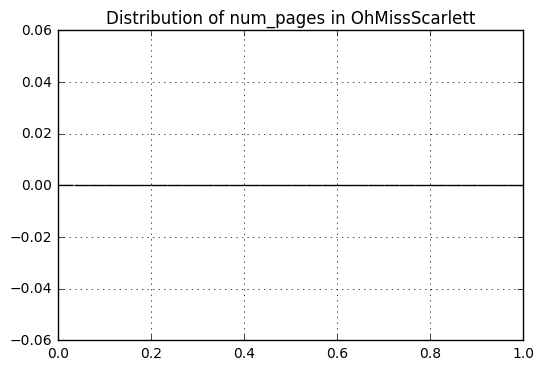

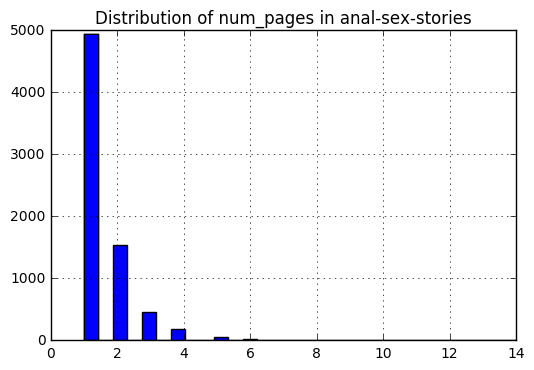

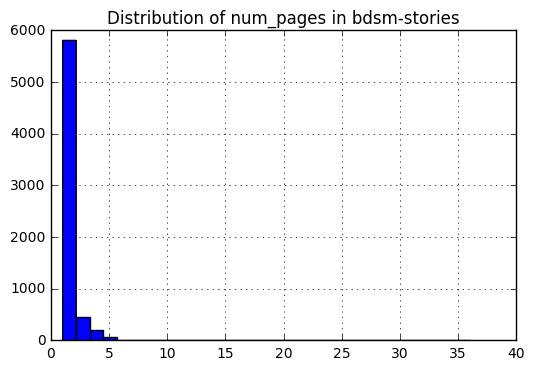

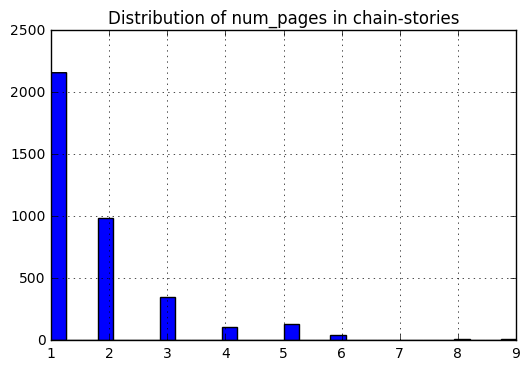

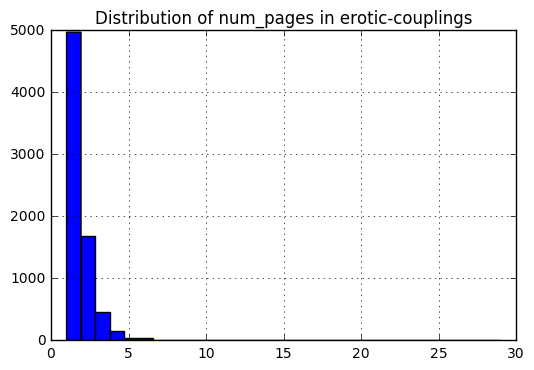

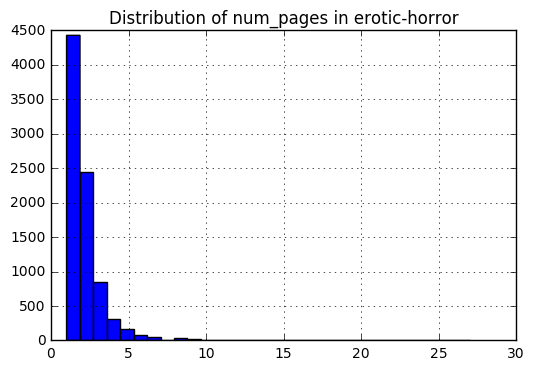

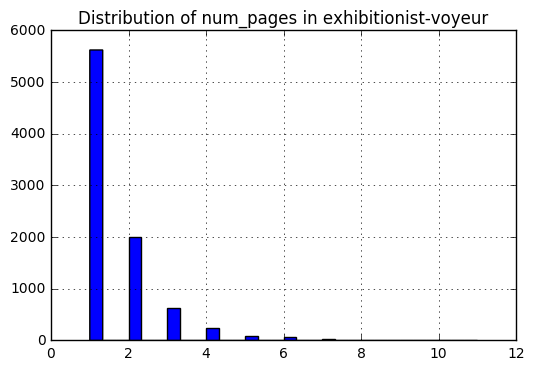

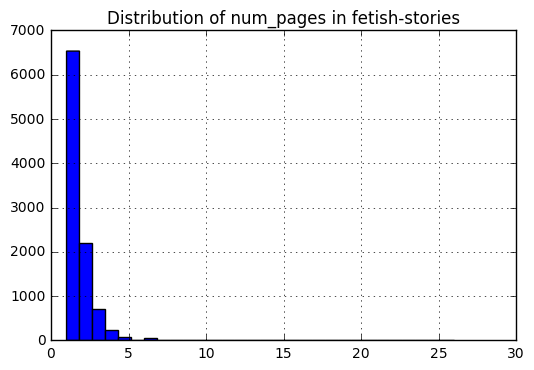

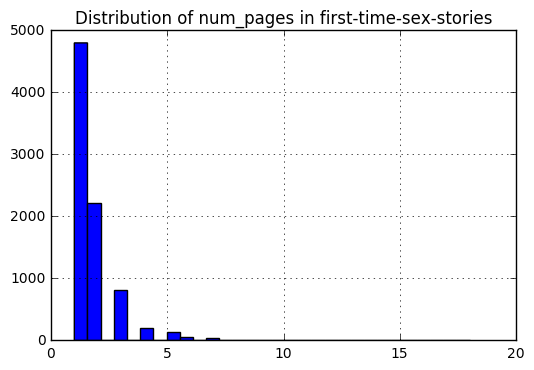

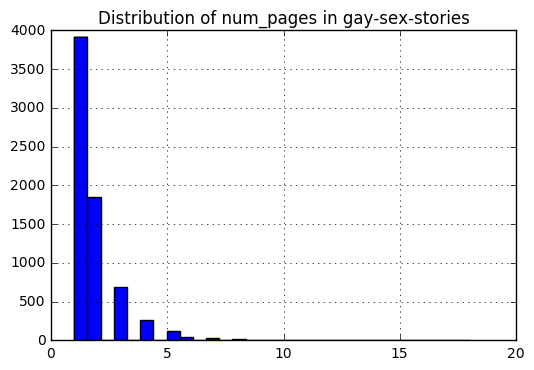

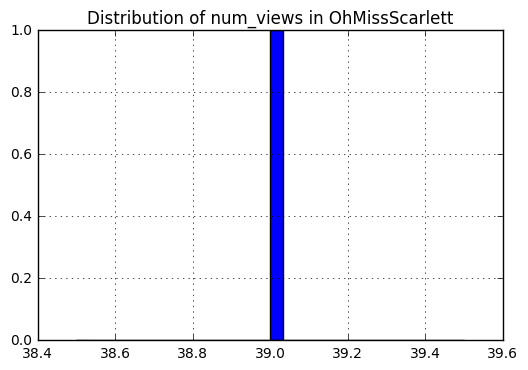

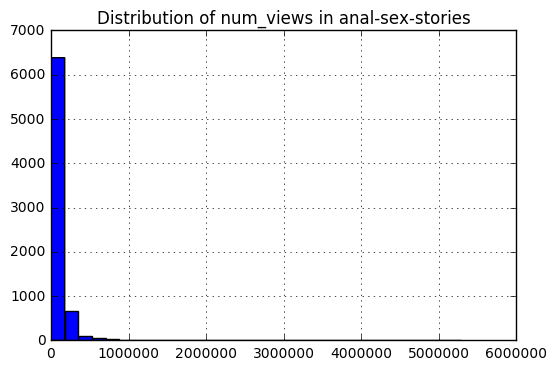

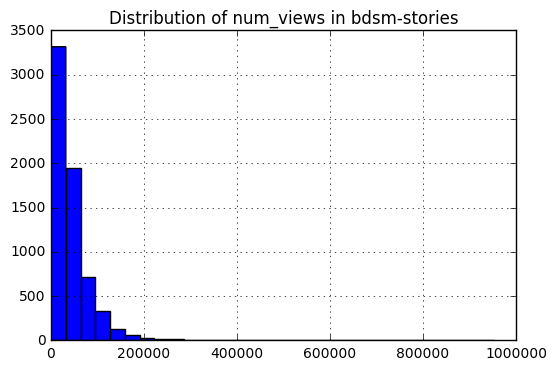

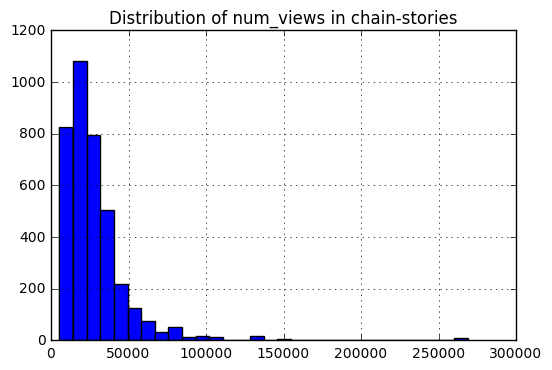

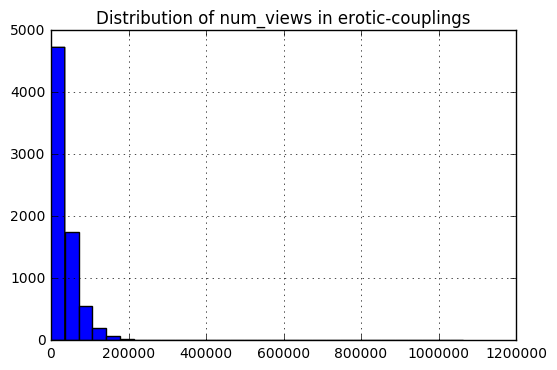

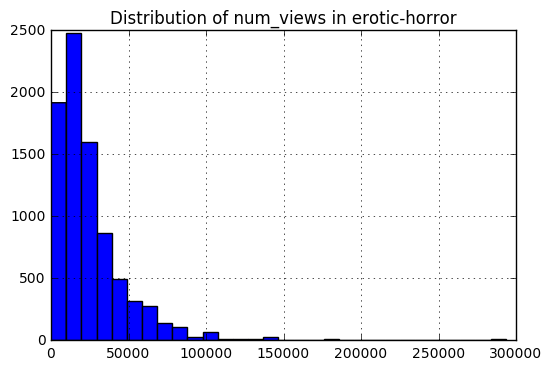

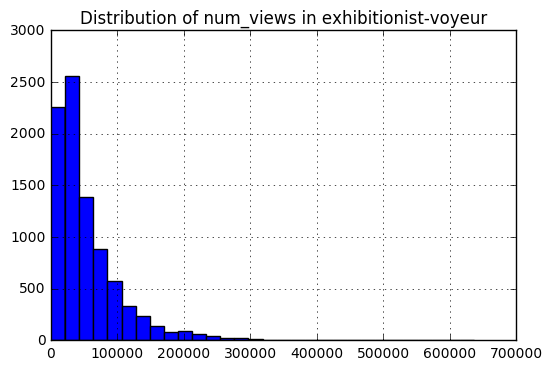

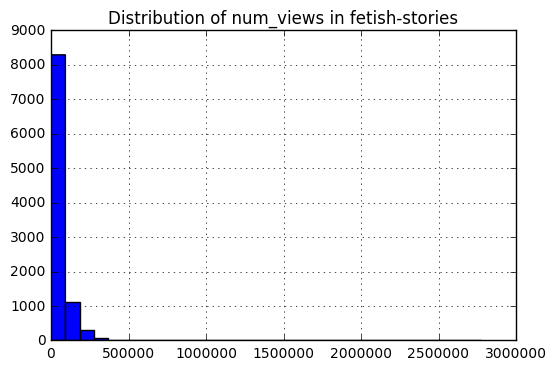

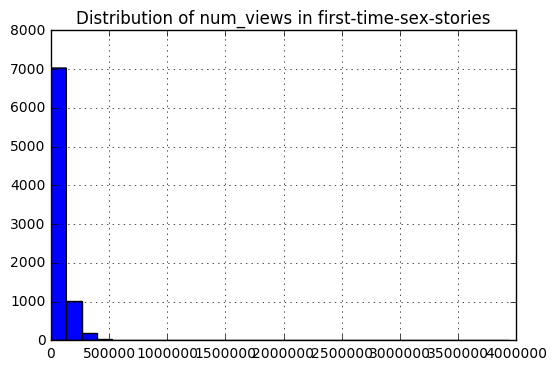

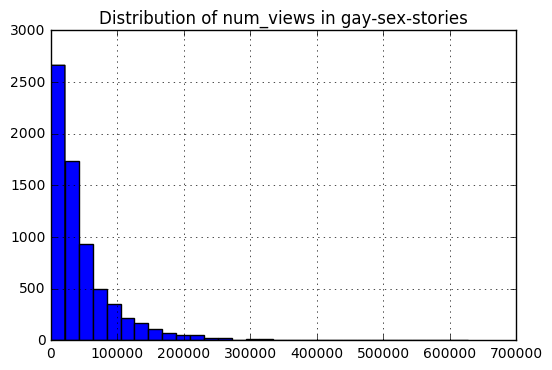

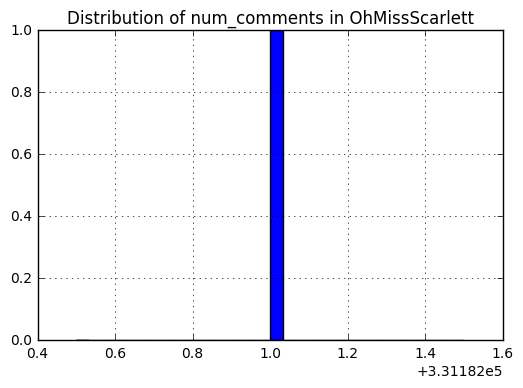

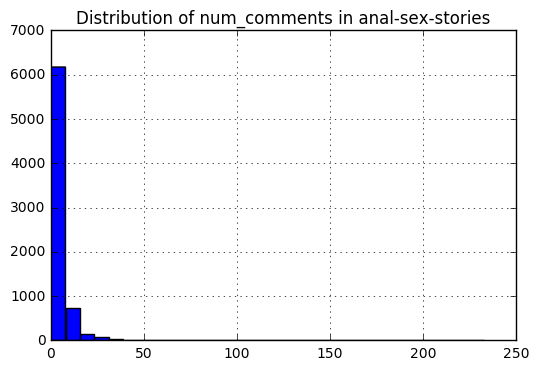

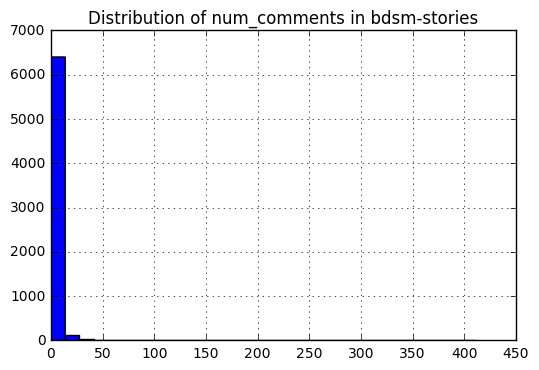

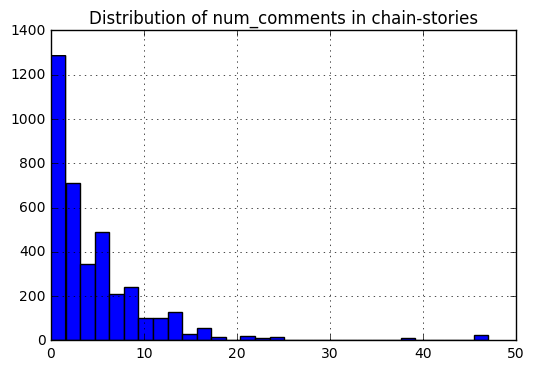

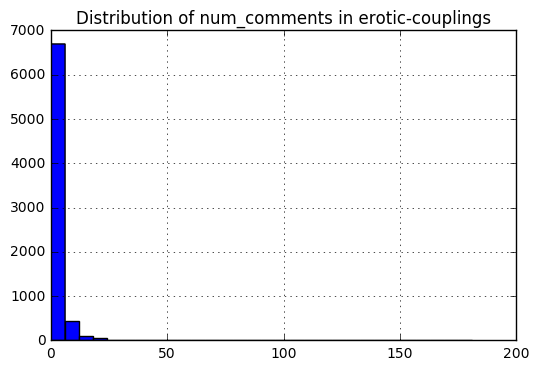

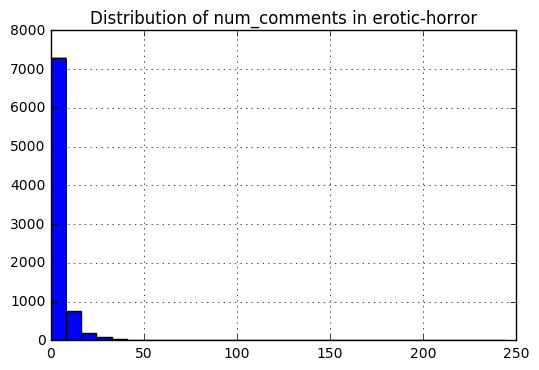

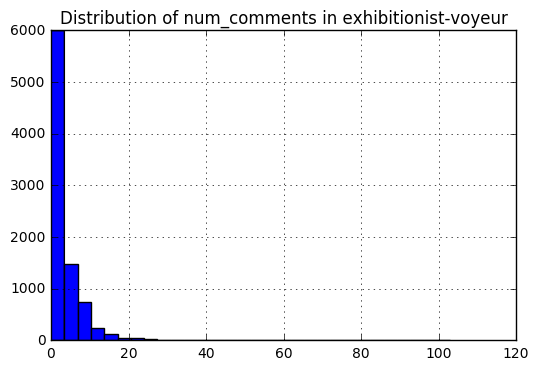

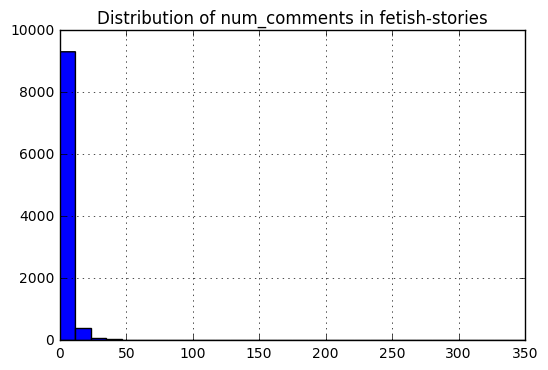

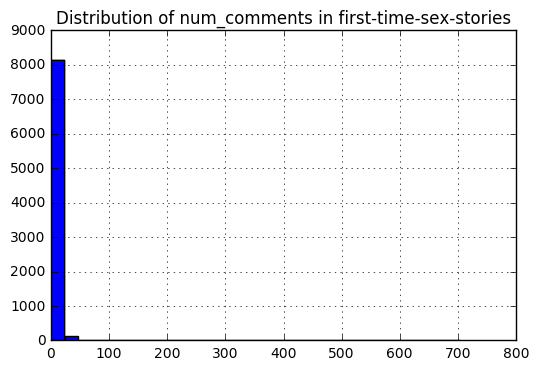

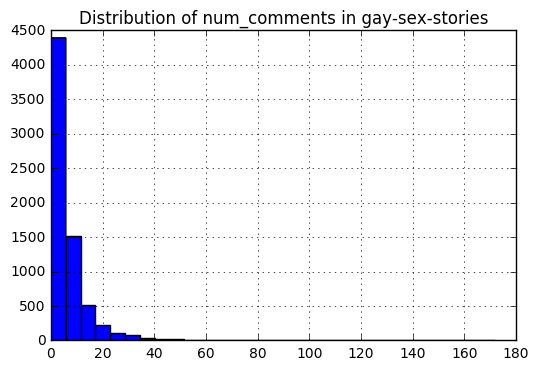

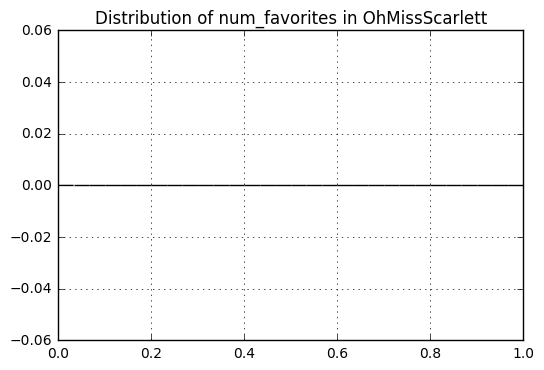

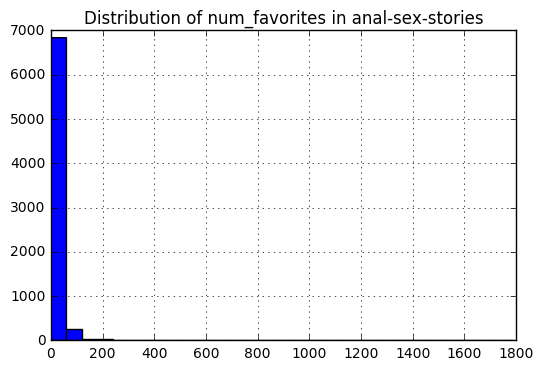

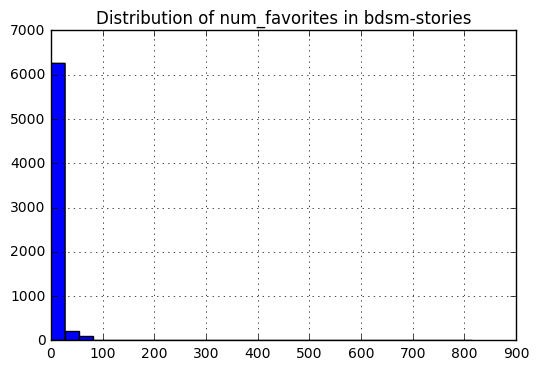

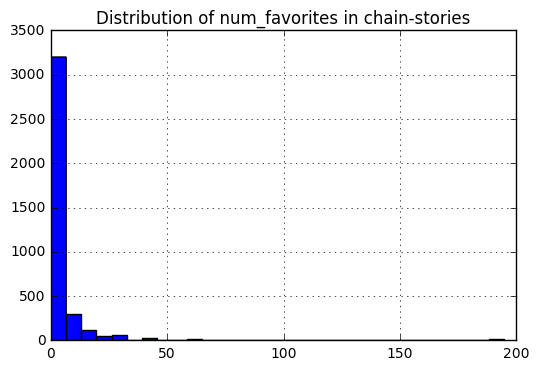

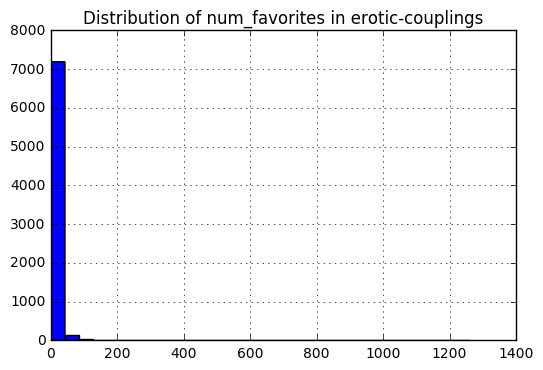

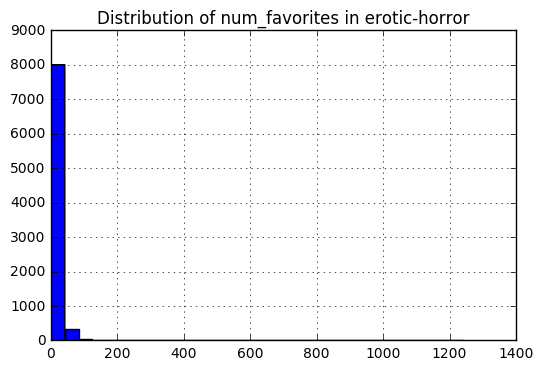

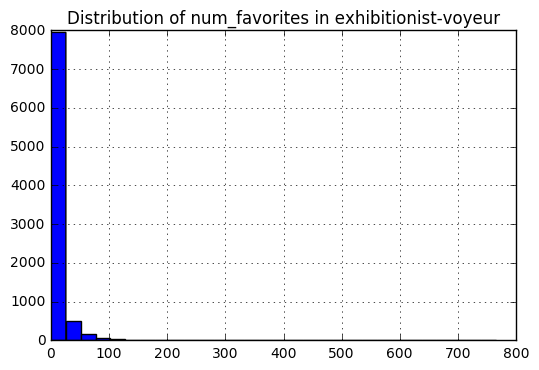

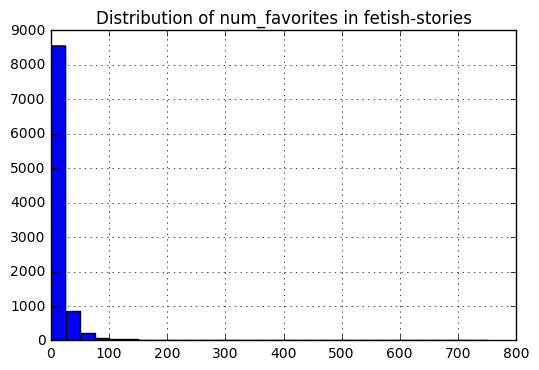

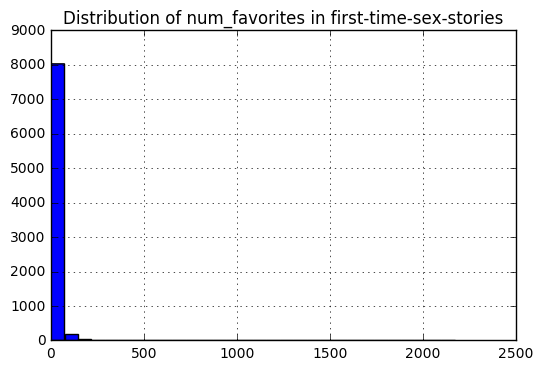

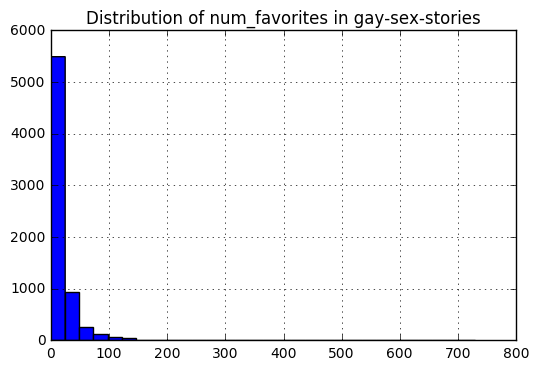

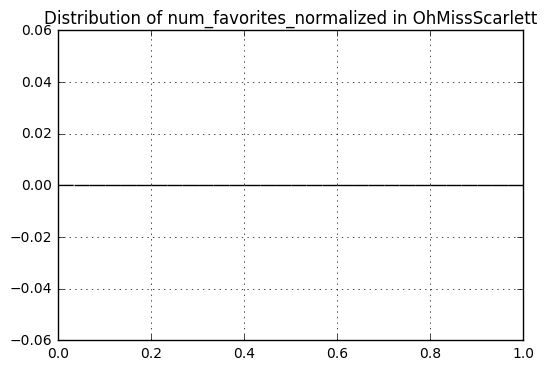

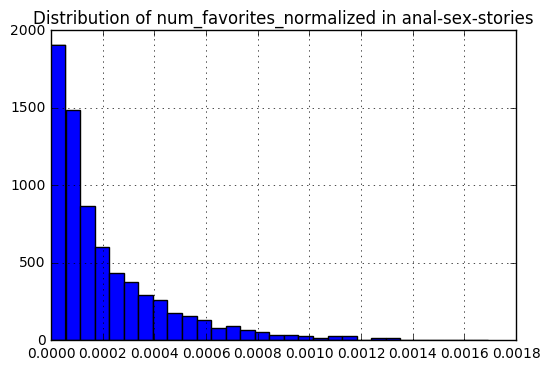

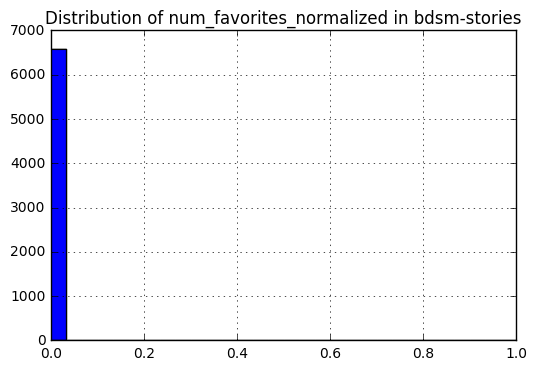

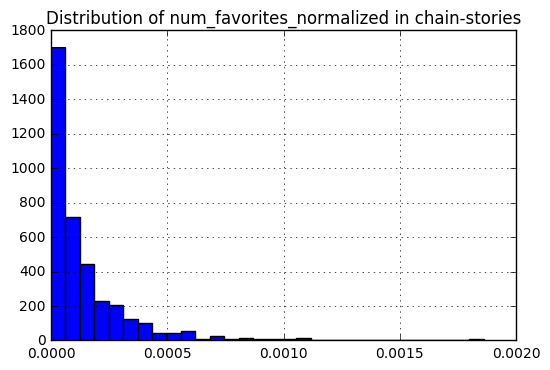

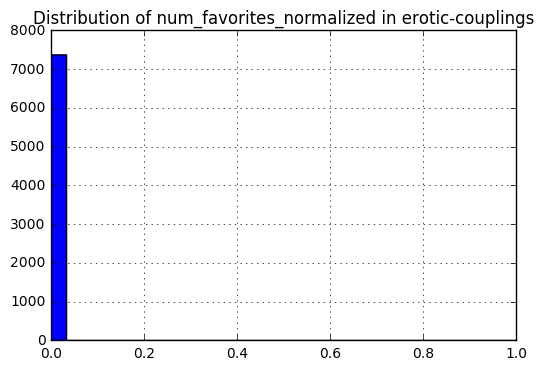

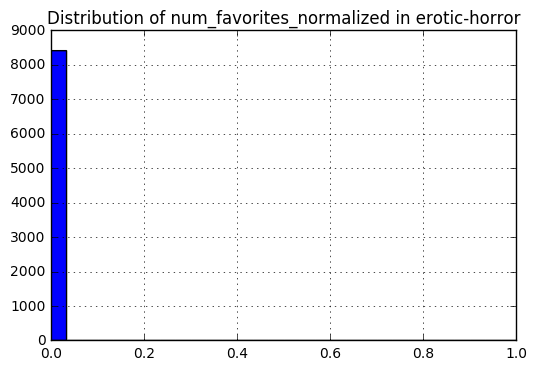

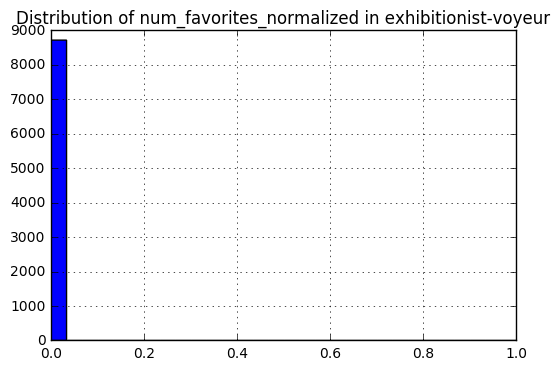

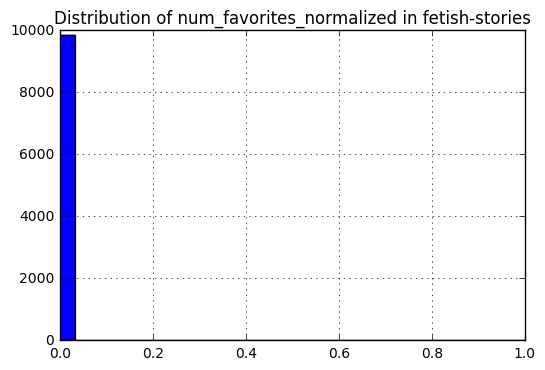

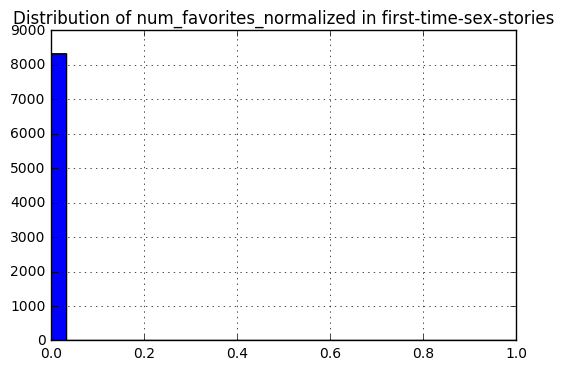

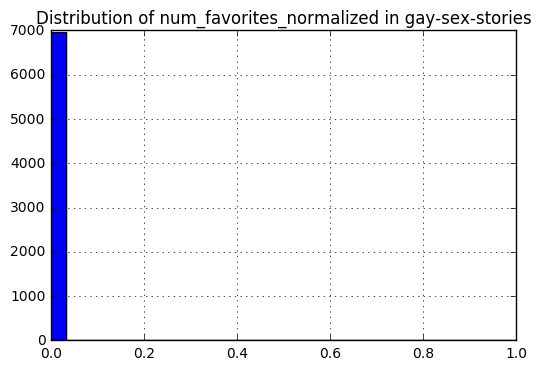

In [95]:
# Plot distributions of stats across categories

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

def plot_distribution(column):
    for category, group in by_category:
        plt.figure()
        group[column].hist(bins=30).set_title('Distribution of ' + column + ' in ' + category)

plot_distribution('num_pages')
plot_distribution('num_views')
plot_distribution('num_comments')
plot_distribution('num_favorites')
plot_distribution('num_favorites_normalized')

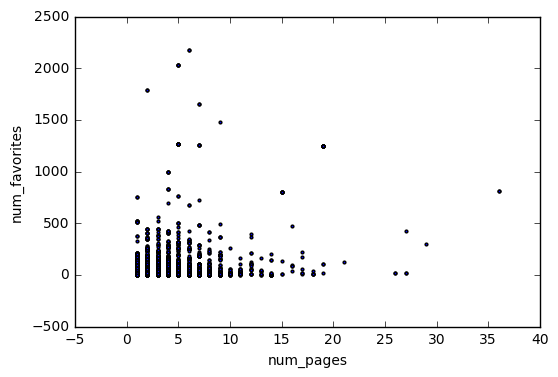

In [112]:
# Does page length correlate with number of favorites?
df.plot.scatter('num_pages', 'num_favorites', s=4)

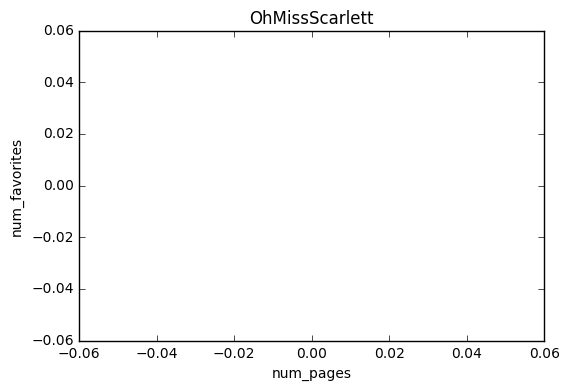

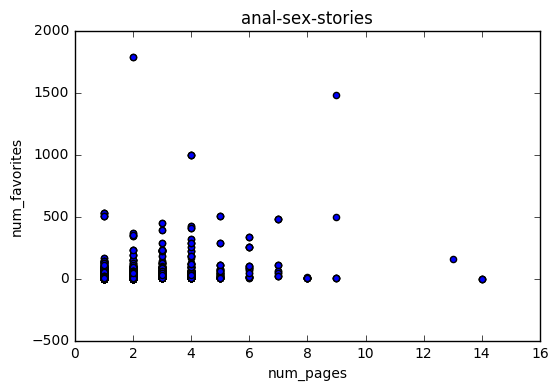

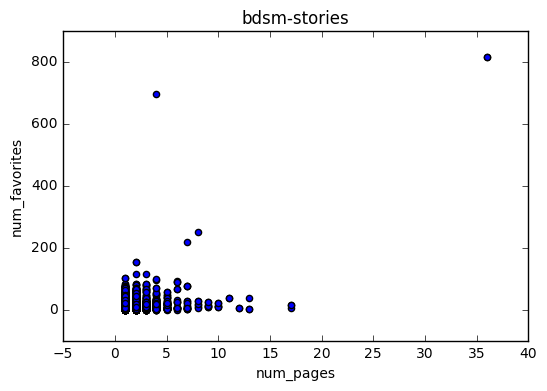

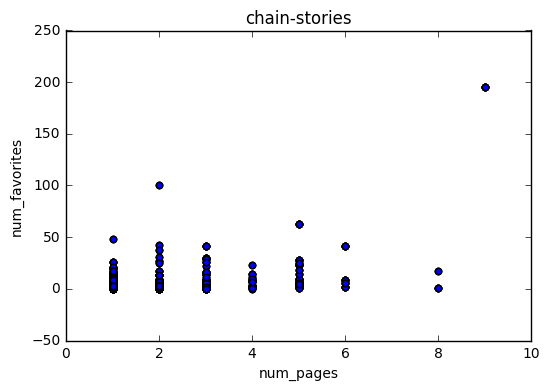

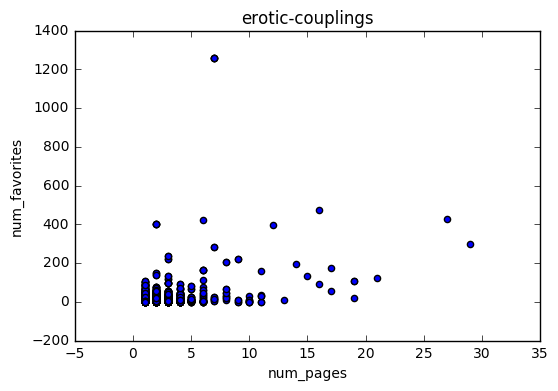

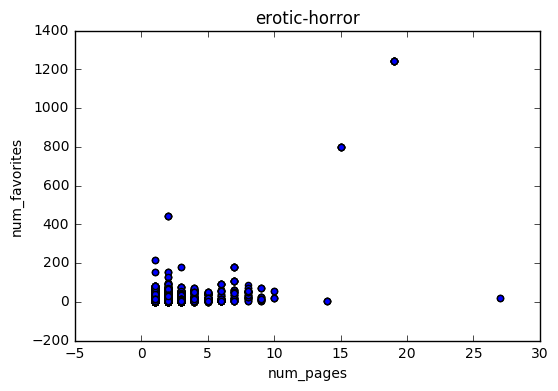

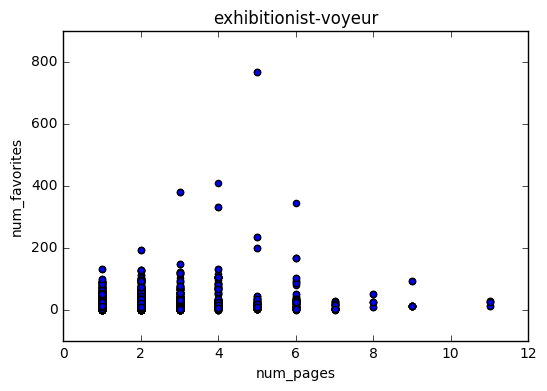

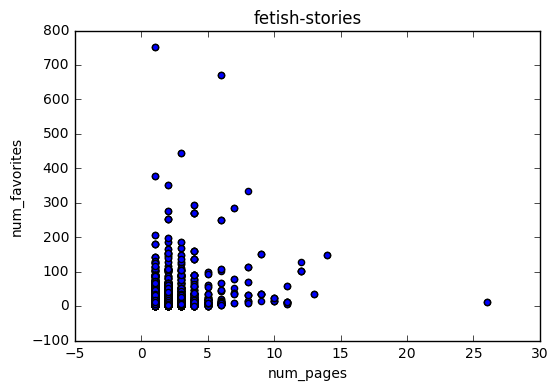

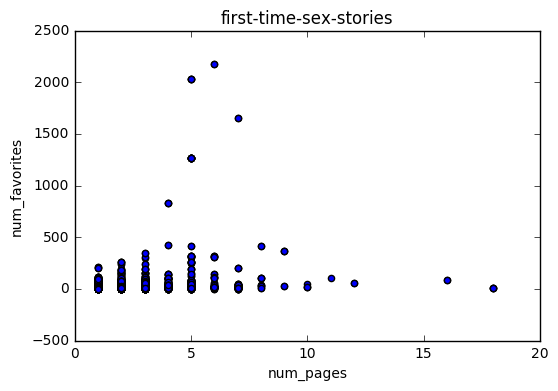

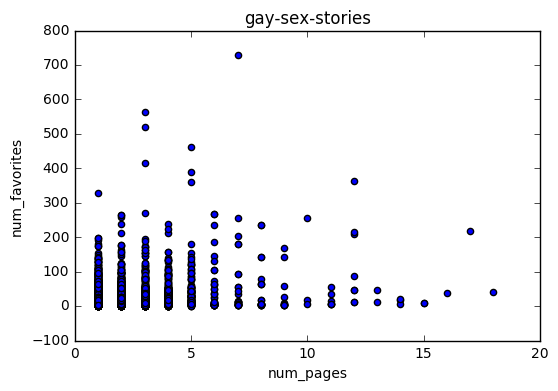

In [113]:
for category, group in by_category:
    plt.figure()
    group.plot.scatter('num_pages', 'num_favorites').set_title(category)

### Story titles and usernames
What are the most common words and bigrams in story titles? What are the most common words and bigrams in usernames? What about collocations? How does this differ across categories? Is there any correlation between word ranking within a category and number of views? Is there a popular structure that is used in given categories (using part of speech tagging)? Can we predict popularity solely based on title and number of pages? Can we predict category based on title / username? Does POS tagging have any impact? What about named entities? Or domain-specific attributes like chapters or sequels (ex: "last night chp 2")? 

In [125]:
def url_to_title(url):
    return ' '.join(url.split('/')[-1].split('-'))

df['story_title'] = df.story_url.map(url_to_title)
df.story_title.head(15)

/Users/morgane/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0                            anal at last 2
2                     turn abouts fair play
3                a mother in laws valentine
4                                  cat tail
5                           unfolding ch 06
6                 backdoor sweetheart ch 03
7                    my best friends girl 1
8                                anal album
9                           whos your daddy
10    how girls night changed my life ch 04
11               please give it to me daddy
12                   waking up with a smile
13                     love thy neighbor 24
14                             tamed by meg
15                              the scent 3
Name: story_title, dtype: object

In [130]:
import nltk

# TODO will have to find a faster way, this is too slow 
words = []
for index, row in df.iterrows():
    words.extend(row.story_title.split())
    
word_counts = nltk.FreqDist(words)
print('Number of unique words:', len(word_counts))

Number of unique words: 11386


In [132]:
word_counts.most_common(20)

[('ch', 22330),
 ('the', 7481),
 ('02', 6103),
 ('01', 5273),
 ('a', 5136),
 ('1', 4096),
 ('and', 4061),
 ('03', 3571),
 ('in', 2990),
 ('of', 2963),
 ('pt', 2413),
 ('04', 2356),
 ('to', 2055),
 ('my', 1921),
 ('2', 1805),
 ('i', 1738),
 ('05', 1630),
 ('for', 1543),
 ('with', 1503),
 ('you', 1391)]

In [159]:
# There are a lot of stopwords, single-char words, and numbers, so remove these
# NOTE: do not remove these when doing POS tagging

from nltk.corpus import stopwords

# NOTE that there are no apostrophes in the titles
stop = set(stopwords.words('english'))

def clean_title(title):
    ws = title.split()
    for w in ws:
        # TODO this is going to be very slow as well
        try:
            int(w)
        except:
            if len(w) > 1 and not w in stop:
                yield w
                
# This was a bit faster
def get_word_counts(data):   
    words = []
    for title in data.story_title:
        words.extend(list(clean_title(title)))

    word_counts = nltk.FreqDist(words)
    return word_counts

In [160]:
# shorthands for "chapter" and "part" are most common 
word_counts = get_word_counts(df)
print('Number of unique words:', len(word_counts))
word_counts.most_common(20)

Number of unique words: 10988


[('ch', 22330),
 ('pt', 2413),
 ('day', 1143),
 ('night', 1121),
 ('first', 976),
 ('love', 950),
 ('new', 840),
 ('time', 748),
 ('fun', 694),
 ('two', 684),
 ('sex', 632),
 ('girl', 616),
 ('story', 599),
 ('fantasy', 541),
 ('man', 492),
 ('one', 477),
 ('naked', 466),
 ('anal', 441),
 ('wife', 417),
 ('ass', 411)]

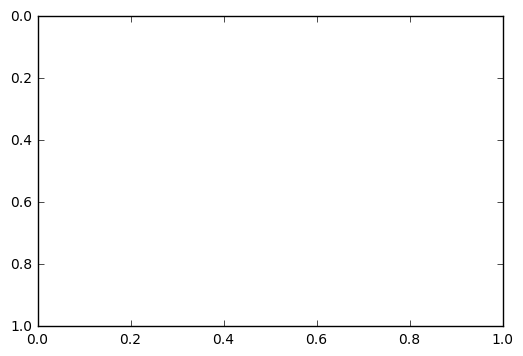

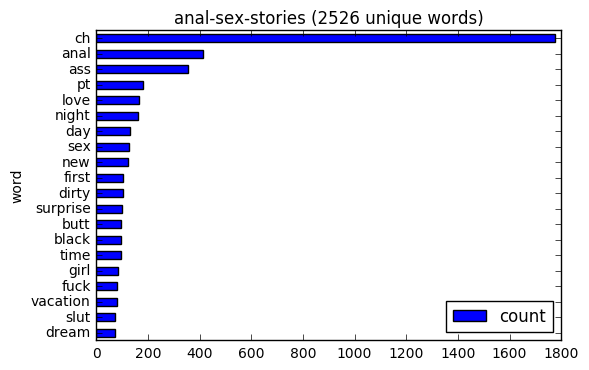

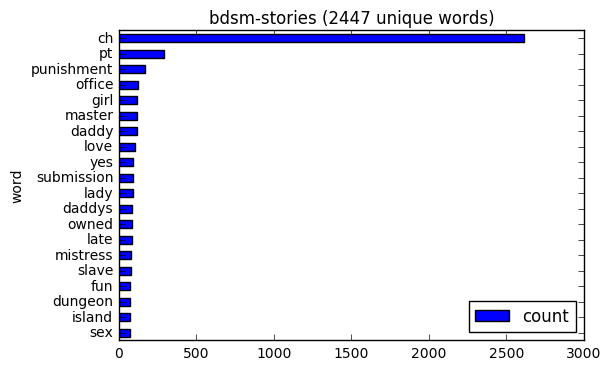

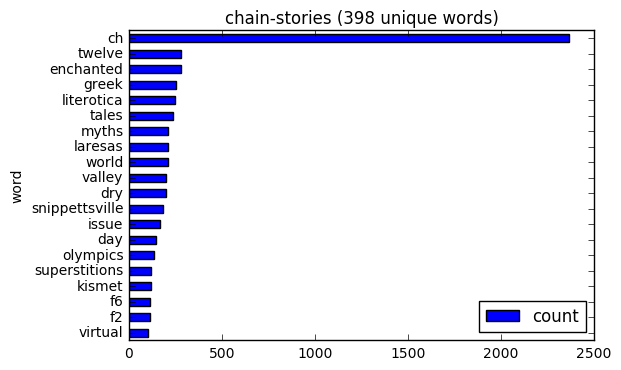

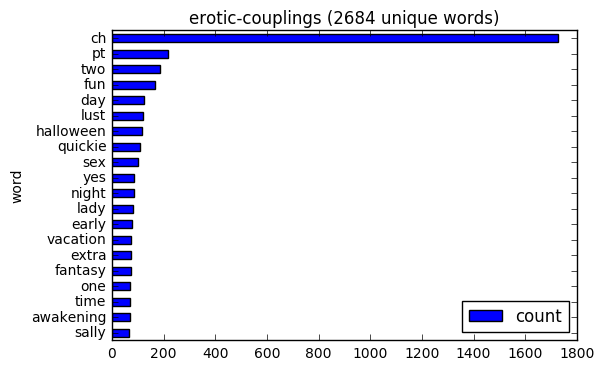

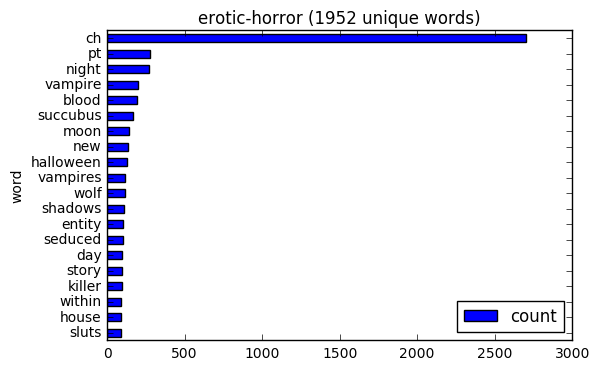

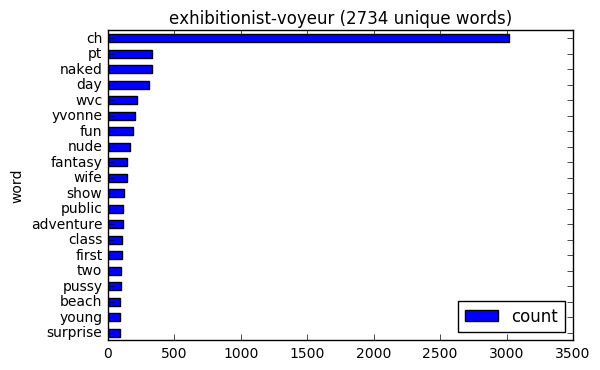

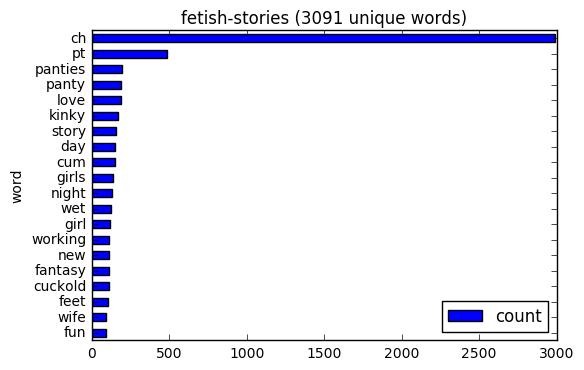

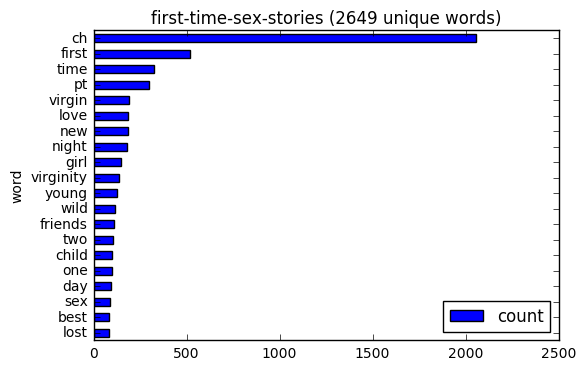

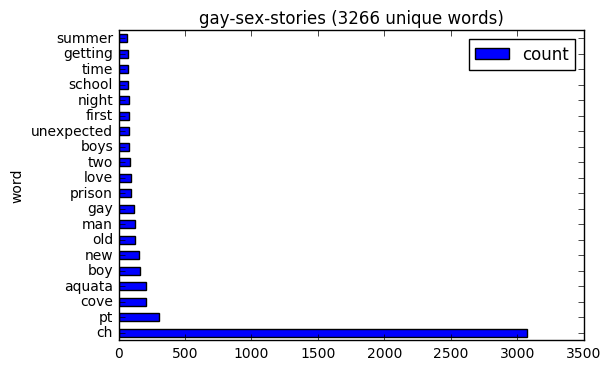

In [164]:
# What about most common words by category?
by_category = df.groupby('category')

def frequency_plot(category, counts, top=20):
    plt.gca().invert_yaxis()
    top_counts = counts.most_common(top)
    data = pd.DataFrame()
    data['word'] = [c[0] for c in top_counts]
    data['count'] = [c[1] for c in top_counts]
    data.index = data.word
    plot_title = category + ' (' + str(len(counts)) + ' unique words)'
    data.plot.barh().set_title(plot_title)

for category, group in by_category:
    counts = get_word_counts(group)
    frequency_plot(category, counts)

It looks like the categories are pretty well differentiated. Some interesting finds:
* Fetish stories are about panties
* Gay sex happens in prisons, during the summer, and unexpectedly
* Yvonne is a voyeur
* Vampires and succubi are sexy
* Chain stories are about Greek myths?? 
* BDSM stories are about punishment at the office
* Anal is sometimes a surprise (yikes)

Now let's take a look at **usernames**...

In [191]:
# Do users often cross-post?
num_categories_per_author = df.groupby('author')['category'].nunique().sort_values(ascending=False)

# For each author, coverage their stories have across all categories
coverage = num_categories_per_author / df.category.nunique()
coverage.head(20)

author
velvetpie               1.000000
SEVERUSMAX              1.000000
Bakeboss                1.000000
PrincessErin            1.000000
Boxlicker101            1.000000
Decayed Angel           1.000000
RedHairedandFriendly    0.888889
SuperHeroRalph          0.888889
Goldeniangel            0.888889
JimBob44                0.777778
Middleagepoet           0.777778
MungoParkIII            0.777778
DireLilith              0.777778
Svenskaflicka           0.777778
andtheend               0.777778
BOSTONFICTIONWRITER     0.777778
SweetPrettyAss          0.666667
Tx Tall Tales           0.666667
Samuelx                 0.666667
Tara_Neale              0.666667
Name: category, dtype: float64

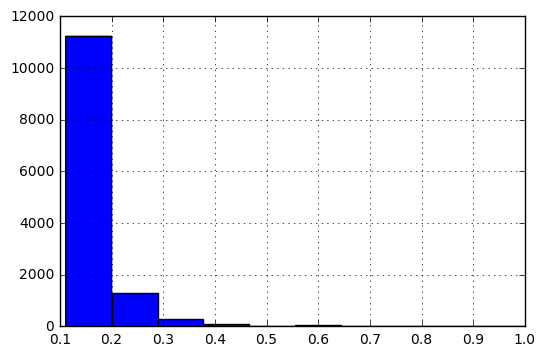

In [205]:
# Plot this distribution
coverage.hist()

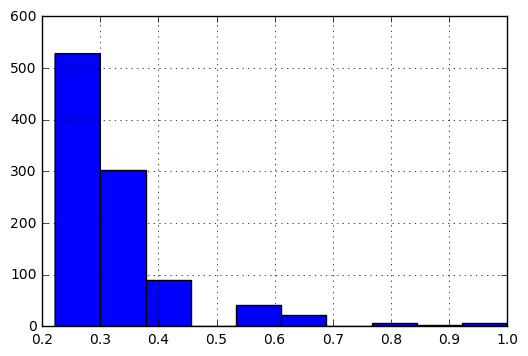

In [206]:
# Just look at the top 1000
coverage.head(1000).hist()

In [ ]:
# What are the most common category pairs? I.e., categories that share authors (can be weighted)
for author, group in df.groupby('author'):
    print(author, group.category.nunique())

# Are usernames differentiated across categories? 
# TODO: prettier plots

*Eve* 1
*bratcat* 1
-Ripley- 1
0131aj 4
02134zoom 1
0311ninja 1
09cutter 1
0ra11yfix8ed 3
100 Angry Bananas 2
1000dreams 2
102582 1
1077ad 1
12inCCrunner 1
12pleaseher 1
130260 3
134 1
13932956 1
13Passions 1
13butterflywing 1
13irish13 1
140306 1
14u2ride 1
17_seconds 1
18YearOldWriter 1
18months 1
191131142081 1
1954kirkland 1
1970man 1
1984slut1984 1
198912 1
1993Anus 1
19Arose 1
19BBW57 1
19yroldvirgin85 2
1DurtyMutha 1
1Hentaigirl 1
1Kiki 1
1SpiceyAngel 3
1badktty 1
1explorer 1
1gearhead 1
1kittykat 1
1mbibry 4
1sexygirl 2
1star 1
1suitedbi 1
21Hells_Angel69 1
232GingerWriter232 1
24F 1
2Xwidderwoman 1
2fast2quick 1
2marcella2 1
2ndAlias 1
31redman 1
320cdp 1
32B_minus 1
32yrsago 1
34DDasian 1
34Will 1
356guy 1
36DD 2
39_Keeper 2
40yrman 1
45longcolt 1
46204_zipper 2
49rldy 1
4SWEETCHEEKS 1
4degrees 2
4eyedbrit 3
4eyes_Scarred 1
4glory6 1
4inchBoy 1
4inchhole 1
4nickeightor 1
4ofSwords 3
505247 1
50FootQueenie1 1
5142sb 1
5425TVR 1
54btmguy 2
5A4nxL32 1
5thRing 2
60 Minute Man 1
6